In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df=pd.read_csv(r"C:\Users\shree\Downloads\train.csv")


In [46]:
test=pd.read_csv(r"C:\Users\shree\Downloads\test.csv")

In [50]:
submission=pd.read_csv("sample_submission.csv")

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,100000,2,2,2,26,-1,-1,-1,0,...,3542,1980,3980,4210,4159,1000,1080,2000,1525,0
1,1,100000,1,2,1,47,0,0,2,0,...,64287,67838,66135,7000,0,2500,5500,0,3000,0
2,2,30000,2,2,2,23,3,3,3,3,...,29176,29958,30520,1200,1200,0,1400,1200,0,1
3,3,280000,2,1,2,31,2,-1,-1,-2,...,0,0,0,168,0,0,0,0,0,0
4,4,210000,1,2,1,54,2,-1,-1,-1,...,485,210,3483,176,195,485,0,4466,417,0


In [11]:
df.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          0     100000    2          2         2   26     -1     -1     -1   
1          1     100000    1          2         1   47      0      0      2   
2          2      30000    2          2         2   23      3      3      3   
3          3     280000    2          1         2   31      2     -1     -1   
4          4     210000    1          2         1   54      2     -1     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
26995  26995      50000    1          2         2   32      0      0      0   
26996  26996     200000    1          1         2   37      2      2      2   
26997  26997      50000    1          1         2   26     -2     -2     -2   
26998  26998      70000    2          2         2   25      0      0      0   
26999  26999     160000    2          2         1   36     -2     -2     -2   

       PAY_4  ...

In [12]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
import seaborn as sns

<AxesSubplot:>

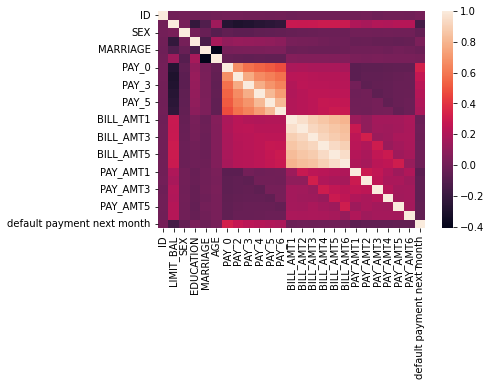

In [17]:
corr = df.corr()
sns.heatmap(corr)

In [20]:
train_y=df['default payment next month']
train_x=df.drop('default payment next month',axis=1)


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sc = StandardScaler()
sc.fit(train_x)

X_std= sc.transform(train_x)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_std, train_y)
y_pred = model.predict(X_std)
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(train_y, y_pred)*100)

Accuracy of Logistic Regression model is: 81.08888888888889


In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=500, max_depth=5, min_samples_leaf=5)

# Train Decision Tree Classifer
clf = clf.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = clf.predict(train_x)

clf.score(train_x, train_y)

print("Accuracy of Decison Tree Classifier model is:", metrics.accuracy_score(train_y, y_pred)*100)

Accuracy of Decison Tree Classifier model is: 82.44814814814815


In [42]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(train_x,train_y)  
print(random_forest.score(train_x,train_y)*100)
op=classifier.predict(test)
print(op)

99.9962962962963
[0 0 0 ... 0 0 0]


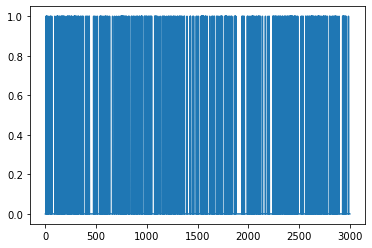

In [43]:
plt.(op)

In [53]:
test[['ID']]

,ID
0,27000
1,27001
2,27002
3,27003
4,27004
...,...
2995,29995
2996,29996
2997,29997
2998,29998


In [54]:
submission['default payment next month']=op

In [55]:
submission.to_csv("Submission.csv",index=None)

In [56]:
pd.read_csv("Submission.csv")

,ID,default payment next month
0,27000,0
1,27001,0
2,27002,0
3,27003,0
4,27004,0
...,...,...
2995,29995,0
2996,29996,0
2997,29997,0
2998,29998,0
